In [29]:
import json
import numpy as np
f = open('/home/ubuntu/OH/OH-Classifier-Framework-Basics/classifier_framework/saved_results/vit_100_7-class_224-224_set1-aug_dwb-loss_no-weights_3-channel_2024-02-26-15-42-44_results.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)

print(data)


{'Accuracy': 0.790788013318535, 'Classification Report': {'head': {'precision': 0.900117508813161, 'recall': 0.9184652278177458, 'f1-score': 0.90919881305638, 'support': 834.0}, 'heart': {'precision': 0.7843971631205674, 'recall': 0.6719319562575942, 'f1-score': 0.7238219895287958, 'support': 823.0}, 'abdomen': {'precision': 0.7746478873239436, 'recall': 0.7166123778501629, 'f1-score': 0.7445008460236886, 'support': 921.0}, 'neck': {'precision': 0.7308558558558559, 'recall': 0.9544117647058824, 'f1-score': 0.8278061224489797, 'support': 680.0}, 'crl': {'precision': 0.9429347826086957, 'recall': 0.7719688542825361, 'f1-score': 0.8489296636085627, 'support': 899.0}, 'upper_extremities': {'precision': 0.6977611940298507, 'recall': 0.699501246882793, 'f1-score': 0.6986301369863014, 'support': 802.0}, 'lower_extremities': {'precision': 0.6877192982456141, 'recall': 0.8769574944071589, 'f1-score': 0.7708947885939037, 'support': 447.0}, 'accuracy': 0.790788013318535, 'macro avg': {'precision'

In [104]:
all_class_names = list(data['Classification Report'].keys())[:-3]

print(all_class_names)

['head', 'heart', 'abdomen', 'neck', 'crl', 'upper_extremities', 'lower_extremities']


In [105]:
import os
all_files = []

for root, dirs, files in os.walk("/home/ubuntu/OH/OH-Classifier-Framework-Basics/classifier_framework/saved_results"):
    file_paths = [os.path.join(root, file) for file in files]
    all_files.extend(file_paths)

all_files = list(filter(lambda x: "_dwb-loss" in x and ".json" in x, all_files))


In [55]:
all_files.pop(7)
all_files.pop(3)

'/home/ubuntu/OH/OH-Classifier-Framework-Basics/classifier_framework/saved_results/vit_100_7-class_224-288_set1-aug_dwb-loss_no-weights_2024-02-24-16-22-20_results.json'

In [56]:
print(len(all_files))

7


In [57]:
all_files

['/home/ubuntu/OH/OH-Classifier-Framework-Basics/classifier_framework/saved_results/sononet-depthwise_100_7-class_224-288_set1-aug_dwb-loss_no-weights_2024-02-24-04-15-16_results.json',
 '/home/ubuntu/OH/OH-Classifier-Framework-Basics/classifier_framework/saved_results/efficientnet-b7_100_7-class_224-288_set1-aug_dwb-loss_no-weights_2024-02-26-08-14-37_results.json',
 '/home/ubuntu/OH/OH-Classifier-Framework-Basics/classifier_framework/saved_results/resnet50_100_7-class_224-288_set1-aug_dwb-loss_no-weights_2024-02-26-22-05-54_results.json',
 '/home/ubuntu/OH/OH-Classifier-Framework-Basics/classifier_framework/saved_results/sononet_100_7-class_224-288_set1-aug_dwb-loss_no-weights_2024-02-25-07-00-12_results.json',
 '/home/ubuntu/OH/OH-Classifier-Framework-Basics/classifier_framework/saved_results/vit_100_7-class_224-224_set1-aug_dwb-loss_no-weights_3-channel_2024-02-26-15-42-44_results.json',
 '/home/ubuntu/OH/OH-Classifier-Framework-Basics/classifier_framework/saved_results/efficientne

In [103]:
experiment_reports = {}

for file_path in all_files:
    f = open(file_path)
    data = json.load(f)
    # experiment_reports[file_path.split("/")[-1].split("_")[0]] =  class_wise_sensitivity_specificity(np.array(data['Confusion Matrix']), all_class_names)
    experiment_reports[file_path.split("/")[-1].split("_")[0]] =  data['Classification Report']

    print(data['Classification Report']['head']['f1-score'])

0.9191797346200241
0.9309927360774819
0.8885077186963979
0.3825363825363825
0.9252801992528019
0.90919881305638
0.9443447037701974
0.8800489596083231
0.9321321321321321


In [92]:
experiment_reports.values()

dict_values([{'head': {'sensitivity': 0.9136690647482014, 'specificity': 0.9864391951006124}, 'heart': {'sensitivity': 0.8797083839611178, 'specificity': 0.928212960942614}, 'abdomen': {'sensitivity': 0.7285559174809989, 'specificity': 0.9596432552954292}, 'neck': {'sensitivity': 0.9014705882352941, 'specificity': 0.9951333051206094}, 'crl': {'sensitivity': 0.743047830923248, 'specificity': 0.9811404481917018}, 'upper_extremities': {'sensitivity': 0.6359102244389028, 'specificity': 0.9565595134665508}, 'lower_extremities': {'sensitivity': 0.8411633109619687, 'specificity': 0.9592659810445654}}, {'head': {'sensitivity': 0.9220623501199041, 'specificity': 0.9892825896762905}, 'heart': {'sensitivity': 0.8614823815309842, 'specificity': 0.9718524983635174}, 'abdomen': {'sensitivity': 0.7861020629750272, 'specificity': 0.9527313266443701}, 'neck': {'sensitivity': 0.9558823529411765, 'specificity': 0.9879390605162929}, 'crl': {'sensitivity': 0.8609566184649611, 'specificity': 0.9897936543155

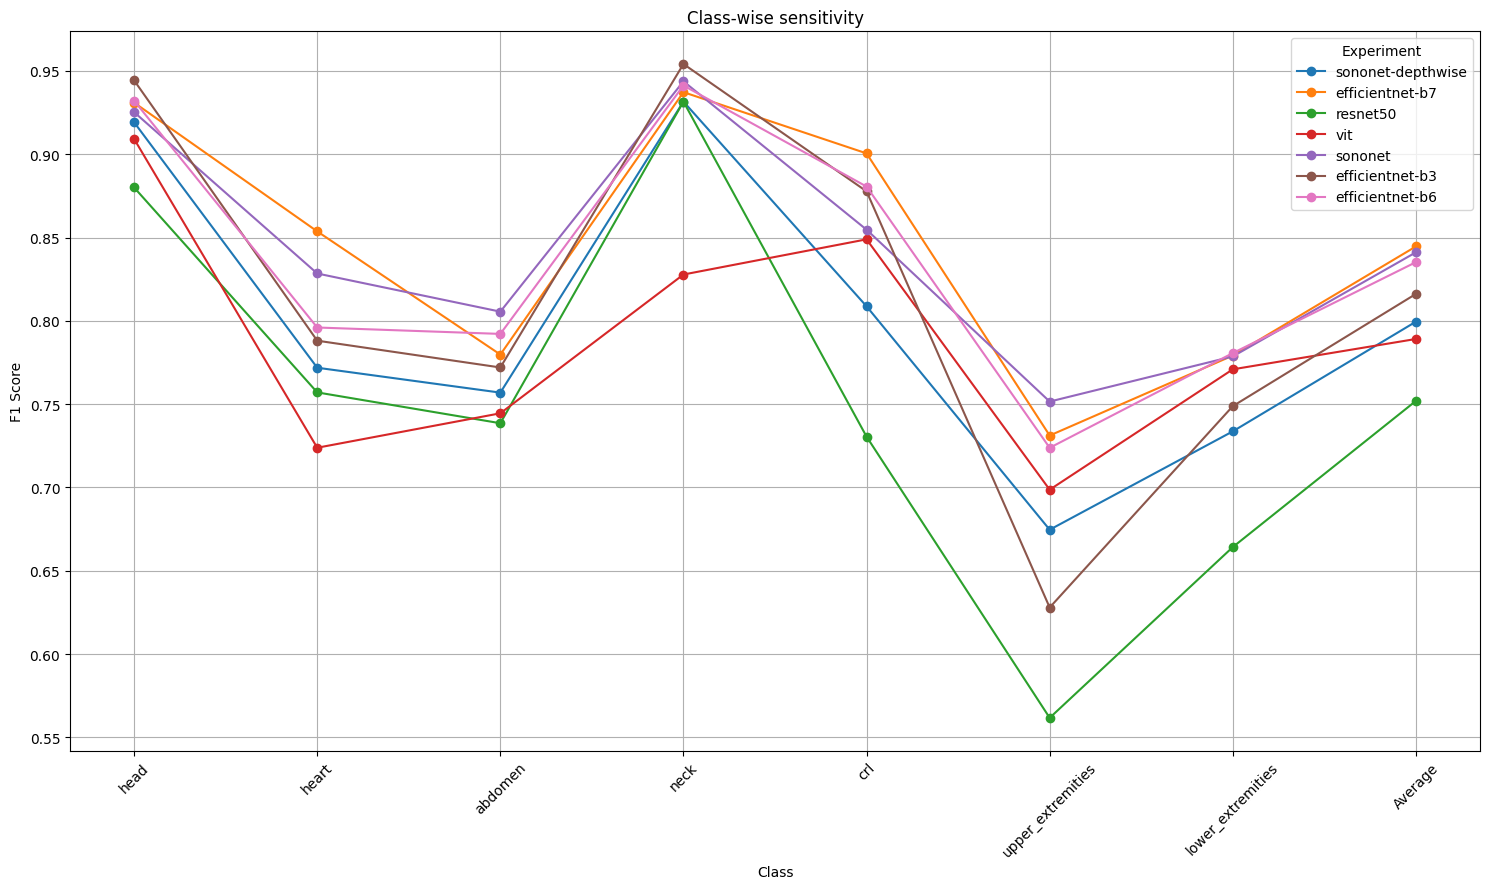

In [106]:
import matplotlib.pyplot as plt

# Sample classification reports (replace these with your actual reports)
# experiment_reports = {
#     "Experiment 1": {
#         "Class 1": 0.87,
#         "Class 2": 0.85,
#         "Class 3": 0.77
#     },
#     "Experiment 2": {
#         "Class 1": 0.85,
#         "Class 2": 0.85,
#         "Class 3": 0.75
#     },
#     "Experiment 3": {
#         "Class 1": 0.82,
#         "Class 2": 0.83,
#         "Class 3": 0.72
#     }
# }

# Extract experiment names
experiment_names = list(experiment_reports.keys())

# Extract class names
class_names = all_class_names
# all_class_names.append("Average")

# Extract F1 scores for each experiment and class
f1_scores = {experiment: [experiment_reports[experiment][cls]['f1-score'] for cls in class_names] for experiment in experiment_names}

for key, value in f1_scores.items():
    f1_scores[key].append(np.average(f1_scores[key]))
    
class_names.append("Average")
    
   
# Plot
plt.figure(figsize=(15, 9))
for experiment, scores in f1_scores.items():
    plt.plot(class_names, scores, marker='o', label=experiment)

plt.title('Class-wise sensitivity')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.legend(title='Experiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Sample classification reports (replace these with your actual reports)
# experiment_reports = {
#     "Experiment 1": classification_report(y_true1, y_pred1, output_dict=True, target_names=class_names),
#     "Experiment 2": classification_report(y_true2, y_pred2, output_dict=True, target_names=class_names),
#     "Experiment 3": classification_report(y_true3, y_pred3, output_dict=True, target_names=class_names)
# }

# Extract class-wise F1 scores for each class and experiment
class_names = sorted(next(iter(experiment_reports.values())).keys())

# Extract F1 scores for each class and experiment
f1_scores = {cls: [experiment_reports[exp][cls]["f1-score"] for exp in experiment_reports] for cls in class_names}

# Plot
plt.figure(figsize=(10, 6))
for cls, scores in f1_scores.items():
    plt.plot(list(experiment_reports.keys()), scores, marker='o', label=cls)

plt.title('Class-wise F1 Scores of Multiple Experiments')
plt.xlabel('Experiment')
plt.ylabel('F1 Score')
plt.legend(title='Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


TypeError: 'float' object is not subscriptable

In [21]:

def class_wise_sensitivity_specificity(confusion_matrix, class_names):
    num_classes = confusion_matrix.shape[0]
    sensitivity = np.zeros(num_classes)
    specificity = np.zeros(num_classes)

    for i in range(num_classes):
        true_positive = confusion_matrix[i, i]
        false_negative = np.sum(confusion_matrix[i, :]) - true_positive
        true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + true_positive
        false_positive = np.sum(confusion_matrix[:, i]) - true_positive
        
        sensitivity[i] = true_positive / (true_positive + false_negative)
        specificity[i] = true_negative / (true_negative + false_positive)

    results = {class_names[i]: {'sensitivity': sensitivity[i], 'specificity': specificity[i]} for i in range(num_classes)}
    return results

In [33]:
sce_dict={}
accuracy_dict={}

head_f1_scores=[]
heart_f1_scores=[]
abdomen_f1_scores=[]
neck_f1_scores=[]
crl_f1_scores=[]
upper_extremities_f1_scores=[]
lower_extremities_f1_scores=[]


head_sensitivity=[]
heart_sensitivity=[]
abdomen_sensitivity=[]
neck_sensitivity=[]
crl_sensitivity=[]
upper_extremities_sensitivity=[]
lower_extremities_sensitivity=[]

head_specificity=[]
heart_specificity=[]
abdomen_specificity=[]
neck_specificity=[]
crl_specificity=[]
upper_extremities_specificity=[]
lower_extremities_specificity=[]

experiment_names=[]



for result_file in all_files:
    experiment_names.append(result_file.split("/")[-1].split("_")[0])
    f = open(result_file)
    data = json.load(f)
    
    head_f1_scores.append(data['Classification Report']['head']['f1-score'])
    heart_f1_scores.append(data['Classification Report']['heart']['f1-score'])
    abdomen_f1_scores.append(data['Classification Report']['abdomen']['f1-score'])
    neck_f1_scores.append(data['Classification Report']['neck']['f1-score'])
    crl_f1_scores.append(data['Classification Report']['crl']['f1-score'])
    upper_extremities_f1_scores.append(data['Classification Report']['upper_extremities']['f1-score'])
    lower_extremities_f1_scores.append(data['Classification Report']['lower_extremities']['f1-score'])
    
    
    class_wise_data = class_wise_sensitivity_specificity(np.array(data['Confusion Matrix']), all_class_names)
    
    head_specificity.append(class_wise_data['head']['specificity'])
    heart_specificity.append(class_wise_data['heart']['specificity'])
    abdomen_specificity.append(class_wise_data['abdomen']['specificity'])
    neck_specificity.append(class_wise_data['neck']['specificity'])
    crl_specificity.append(class_wise_data['crl']['specificity'])
    upper_extremities_specificity.append(class_wise_data['upper_extremities']['specificity'])
    lower_extremities_specificity.append(class_wise_data['lower_extremities']['specificity'])
    
    head_sensitivity.append(class_wise_data['head']['sensitivity'])
    heart_sensitivity.append(class_wise_data['heart']['sensitivity'])
    abdomen_sensitivity.append(class_wise_data['abdomen']['sensitivity'])
    neck_sensitivity.append(class_wise_data['neck']['sensitivity'])
    crl_sensitivity.append(class_wise_data['crl']['sensitivity'])
    upper_extremities_sensitivity.append(class_wise_data['upper_extremities']['sensitivity'])
    lower_extremities_sensitivity.append(class_wise_data['lower_extremities']['sensitivity'])
    
    
    
    

    
    
    

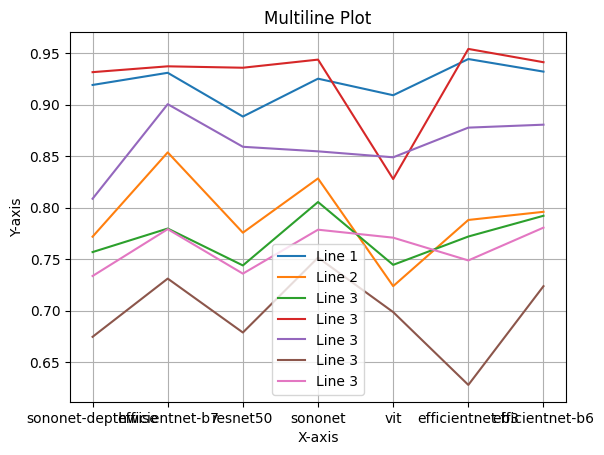

In [34]:
import matplotlib.pyplot as plt

# Example data
x_values = experiment_names
# y1_values = [5, 7, 6, 8, 7]
# y2_values = [3, 6, 4, 7, 5]
# y3_values = [4, 5, 3, 6, 4]

# Create plot
plt.plot(x_values, head_f1_scores, label='Line 1')
plt.plot(x_values, heart_f1_scores, label='Line 2')
plt.plot(x_values, abdomen_f1_scores, label='Line 3')

plt.plot(x_values, neck_f1_scores, label='Line 3')
plt.plot(x_values, crl_f1_scores, label='Line 3')
plt.plot(x_values, upper_extremities_f1_scores, label='Line 3')
plt.plot(x_values, lower_extremities_f1_scores, label='Line 3')


# Customize plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiline Plot')
plt.legend()  # Add legend

# Show plot
plt.grid(True)
plt.show()


In [46]:
print(data['Accuracy'])

0.790788013318535


In [47]:
print(data['static_calibration_error'])

0.033892217879220754


['head', 'heart', 'abdomen', 'neck', 'crl', 'upper_extremities', 'lower_extremities']


In [49]:

def class_wise_sensitivity_specificity(confusion_matrix, class_names):
    num_classes = confusion_matrix.shape[0]
    sensitivity = np.zeros(num_classes)
    specificity = np.zeros(num_classes)

    for i in range(num_classes):
        true_positive = confusion_matrix[i, i]
        false_negative = np.sum(confusion_matrix[i, :]) - true_positive
        true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + true_positive
        false_positive = np.sum(confusion_matrix[:, i]) - true_positive
        
        sensitivity[i] = true_positive / (true_positive + false_negative)
        specificity[i] = true_negative / (true_negative + false_positive)

    results = {class_names[i]: {'sensitivity': sensitivity[i], 'specificity': specificity[i]} for i in range(num_classes)}
    return results

In [50]:
cm = np.array(data['Confusion Matrix'])

In [51]:
metric_dict = class_wise_sensitivity_specificity(cm, all_class_names)

In [52]:
print(metric_dict)

{'head': {'sensitivity': 0.9184652278177458, 'specificity': 0.981408573928259}, 'heart': {'sensitivity': 0.6719319562575942, 'specificity': 0.9668339515601134}, 'abdomen': {'sensitivity': 0.7166123778501629, 'specificity': 0.9571906354515051}, 'neck': {'sensitivity': 0.9544117647058824, 'specificity': 0.9494286923402454}, 'crl': {'sensitivity': 0.7719688542825361, 'specificity': 0.9906811626358997}, 'upper_extremities': {'sensitivity': 0.699501246882793, 'specificity': 0.9472198088618593}, 'lower_extremities': {'sensitivity': 0.8769574944071589, 'specificity': 0.9641056664650131}}


In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


Confusion matrix, without normalization


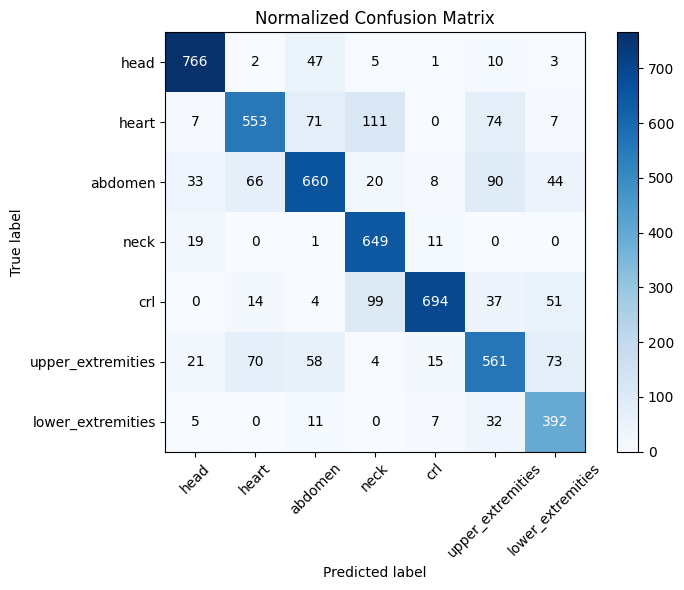

In [54]:
plot_confusion_matrix(cm, classes=all_class_names, normalize=False, title='Confusion Matrix')


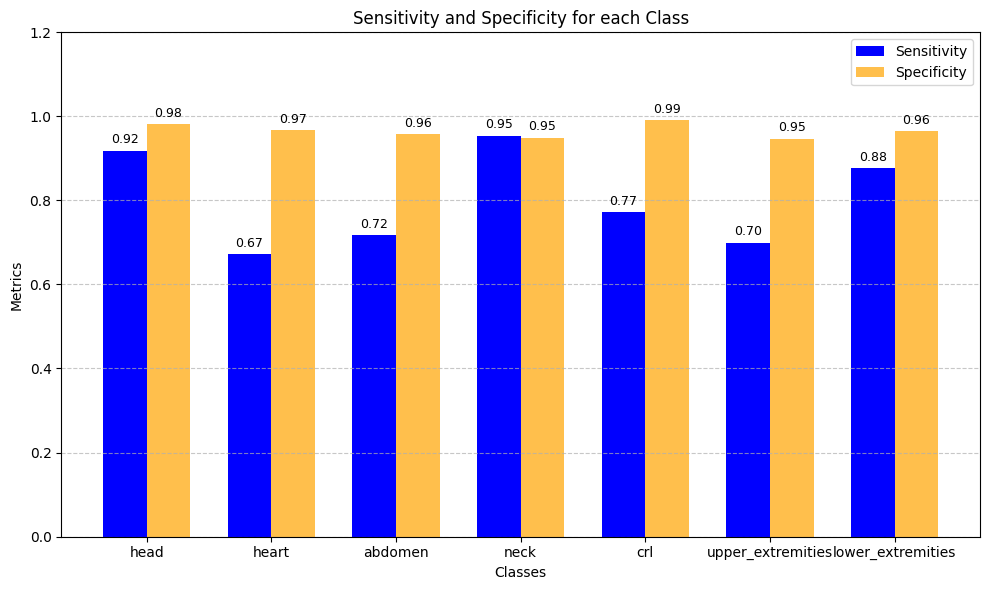

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Example Multiclass Confusion Matrix (3 classes)
conf_matrix = cm

# Calculate Sensitivity (Recall) and Specificity
def sensitivity_specificity(conf_matrix):
    sensitivity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    
    # Calculating Specificity for each class
    num_classes = len(conf_matrix)
    specificity = []
    for i in range(num_classes):
        exclude_row = np.delete(conf_matrix, i, axis=0)
        exclude_col = np.delete(exclude_row, i, axis=1)
        tn = np.sum(exclude_col)
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        specificity.append(tn / (tn + fp))
    
    return sensitivity, specificity

# Get Sensitivity and Specificity for each class
sensitivity, specificity = sensitivity_specificity(conf_matrix)

# Labels for each class
labels = all_class_names

# Values for bar plots
sensitivity_values = sensitivity
specificity_values = specificity

# Plot Sensitivity (Recall) and Specificity side by side
bar_width = 0.35
index = np.arange(len(labels))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index, sensitivity_values, bar_width, color='blue', label='Sensitivity')
bar2 = plt.bar(index + bar_width, specificity_values, bar_width, color='orange', label='Specificity', alpha=0.7)

# Add values on top of bars
for i, (value1, value2) in enumerate(zip(sensitivity_values, specificity_values)):
    plt.text(i, value1 + 0.01, f'{value1:.2f}', ha='center', va='bottom', color='black', fontsize=9)
    plt.text(i + bar_width, value2 + 0.01, f'{value2:.2f}', ha='center', va='bottom', color='black', fontsize=9)

plt.xlabel('Classes')
plt.ylabel('Metrics')
plt.title('Sensitivity and Specificity for each Class')
plt.xticks(index + bar_width / 2, labels)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1.2)
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import csv

# Load the .npy file
data = np.load('/home/ubuntu/OH/OH-Classifier-Framework-Basics/classifier_framework/saved_results/sononet_100_7-class_224-288_set1-aug_mce-loss_no-weights_2024-03-04-13-24-20.npy')

# Assuming data is a 2D array, you can save it to a CSV file
with open('stuff1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)